### Laboratorium 5 - zadania - transformacja Hougha

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Zadanie 1

Zbadaj wpływ parametrów transformacji Hougha na jakość detekcji prostych na przykładzie obrazu `norway`. Wykorzystaj ulubiony detektor krawędzi i zaprezentuj jego wynik przed użyciem transformacji Hougha. Zapoznaj się z dokumentacją funkcji [`cv2.HoughLines`](https://docs.opencv.org/4.5.3/dd/d1a/group__imgproc__feature.html#ga46b4e588934f6c8dfd509cc6e0e4545a), zwłaszcza parametrami sterującymi rozdzielczością `rho`, `theta` oraz progiem (`threshold`). Błędnie dobrany próg może szczególnie negatywnie wpłynąć na wyniki.

Zacznij od znalezienia odpowiednich parametrów detektora krawędzi - jeśli na tym etapie wyniki będą słabe, to dalej będzie tylko gorzej (_garbage-in, garbage-out_) - ale nie skupiaj się na badaniu ich wpływu na wyniki.

Zadanie _nie_ polega na zrobieniu grid searcha parametrów transformacji Hougha, tylko na zrozumieniu zachowania parametrów `rho` i `theta`, oraz wpływu progu.

Ostateczny rezultat zaprezentuj w postaci odcinków naniesionych na kopię obrazu wejściowego (patrz komórka `[3]`).

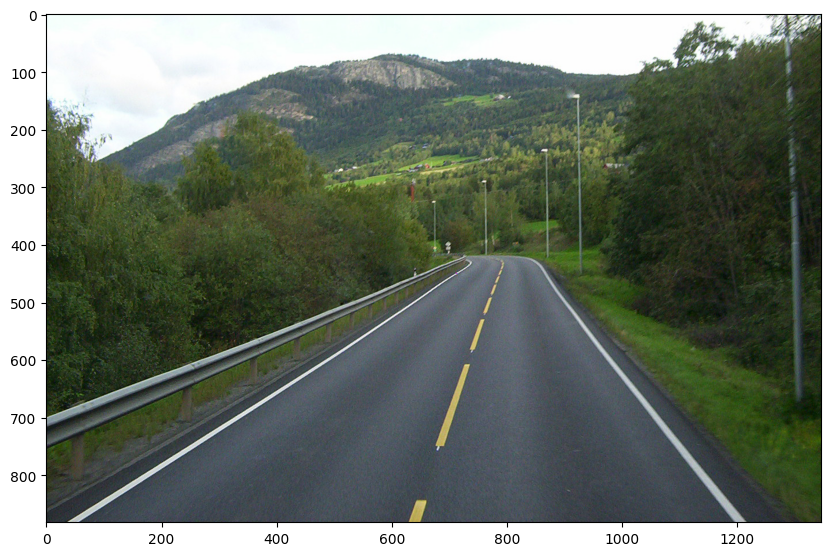

In [12]:
norway = cv2.imread('./Lab5_dane/norway.jpg')
plt.subplots(1, 1, figsize=(10,10))[1].imshow(norway[..., ::-1]);

In [13]:
def rhotheta2xy(line):
    # konwersja parametrów prostej w układzie rho-theta do odcinka w układzie kartezjańskim
    # wynik można użyć jako argumenty funkcji cv2.line
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 5000*(-b))
    y1 = int(y0 + 5000*(a))
    x2 = int(x0 - 5000*(-b))
    y2 = int(y0 - 5000*(a))
    return x1, y1, x2, y2

pi = 180 stopni
x = a


In [5]:
def degrees_to_radians(angle):
    return (np.pi * angle) / 180

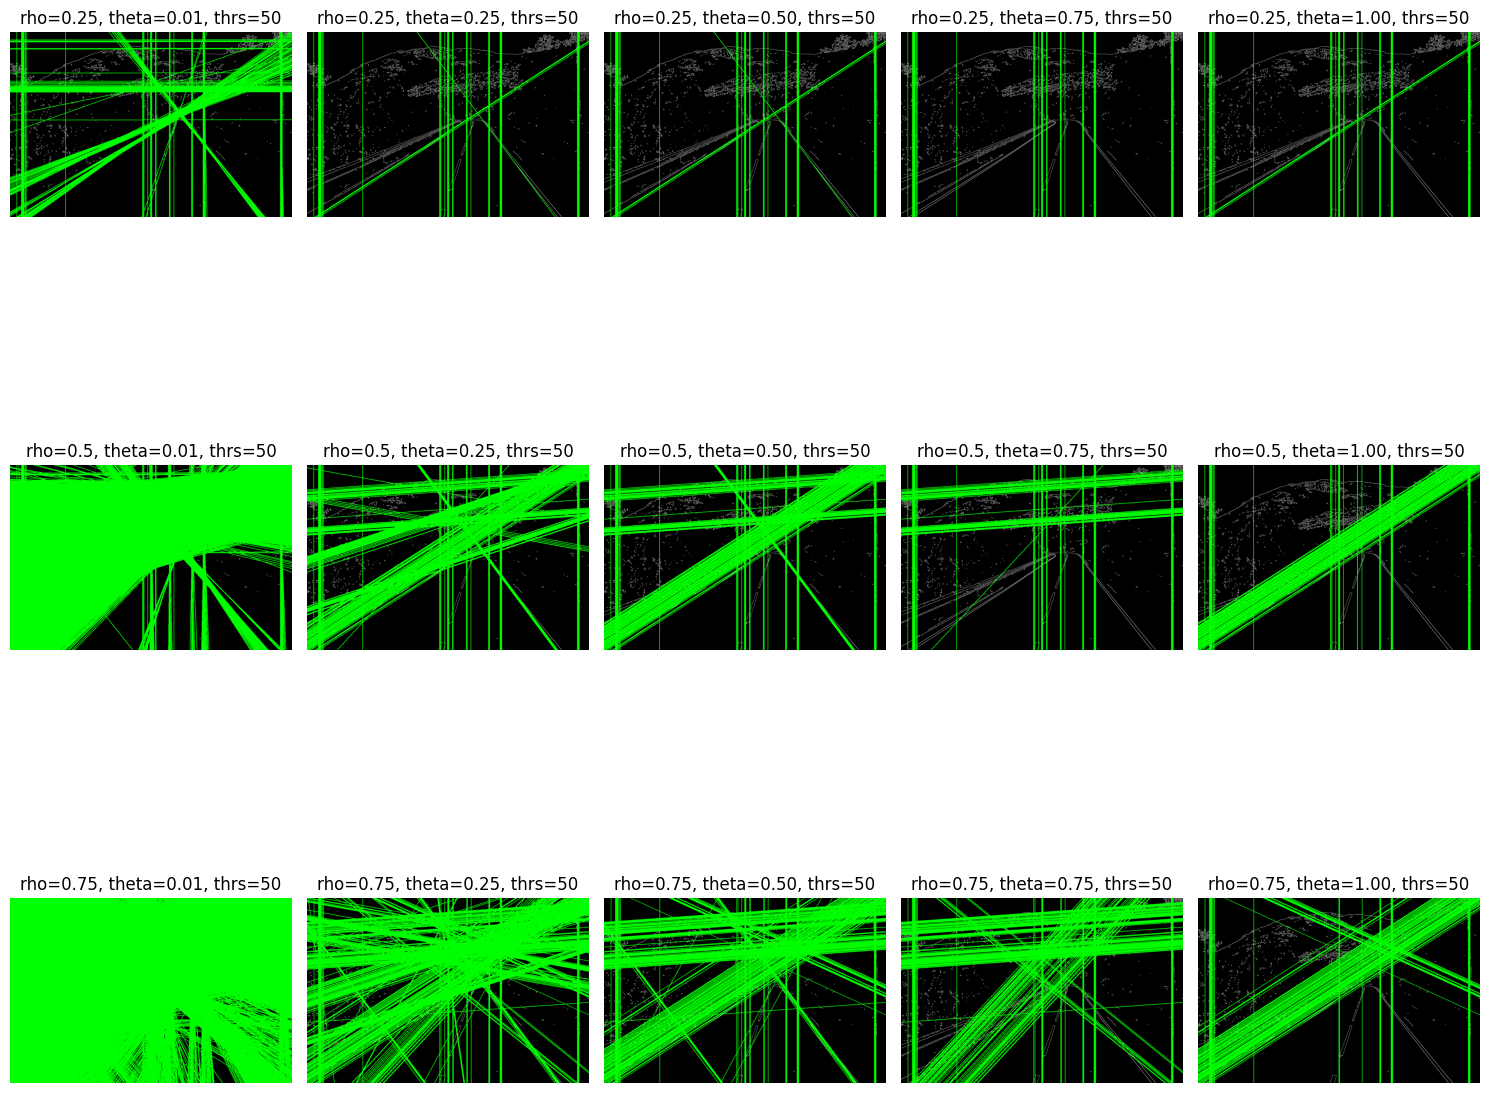

In [9]:
# Define the ranges for rho, theta, and threshold
rho_values = [0.25, 0.5, 0.75]
theta_values = [
    0.01,
    0.25,
    0.5,
    0.75,
    1
]
threshold=50

# Read the image
norway = cv2.imread('./Lab5_dane/norway.jpg')

# Apply Gaussian blur and Canny edge detection
blur = cv2.GaussianBlur(norway, (5, 5), 0)
edges = cv2.Canny(blur, 80, 120)

# Create subplots
fig, axes = plt.subplots(len(rho_values), len(theta_values), figsize=(15, 15))

# Loop over the parameter ranges
for i, rho in enumerate(rho_values):
    for j, theta in enumerate(theta_values):
        # Copy the original image to draw lines on
        norway_copy = edges.copy()
        norway_copy = cv2.cvtColor(norway_copy, cv2.COLOR_GRAY2BGR)
        # Perform Hough Line Transform
        lines = cv2.HoughLines(edges, rho=rho, theta=theta, threshold=threshold)

        # Draw the lines on the image
        if lines is not None:
            for line in lines:
                x1, y1, x2, y2 = rhotheta2xy(line)
                
                cv2.line(norway_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Plot the result
        ax = axes[i, j]
        ax.imshow(norway_copy)
        ax.set_title(f'rho={rho}, theta={theta:.2f}, thrs={threshold}')
        ax.axis('off')

plt.tight_layout()
plt.show()


 * rho - 
 * theta - The angle in radians from the positive x-axis to the point in polar coordinates.
 

Rozwiązanie:

#### Zadanie 2

Dany jest obraz `pillbox`. Wykorzystaj transformację Hougha dla prostych, aby wykryć krawędzie między komórkami organizera.

Dla odmiany, w tym zadaniu nie jest istotne badanie parametrów ale wyłącznie końcowy wynik.

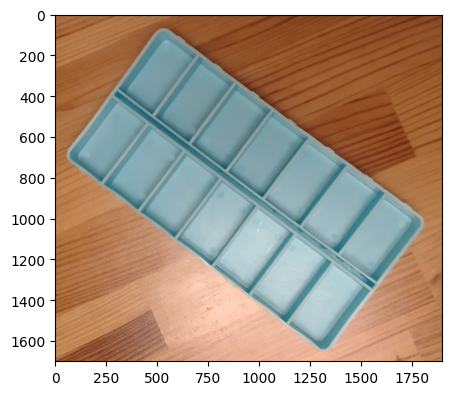

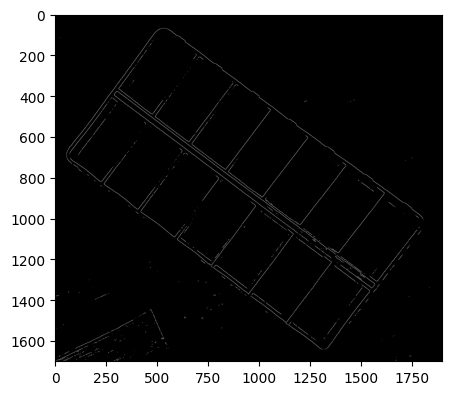

In [19]:
pillbox = cv2.imread('./Lab5_dane/pillbox.png')
figsize = (5,5)
plt.subplots(1, 1, figsize=figsize)[1].imshow(pillbox[..., ::-1])

blur = cv2.GaussianBlur(pillbox, (5, 5), 0)
edges = cv2.Canny(blur, 100, 100)
plt.subplots(1, 1, figsize=figsize)[1].imshow(edges, cmap="gray")



Rozwiązanie:

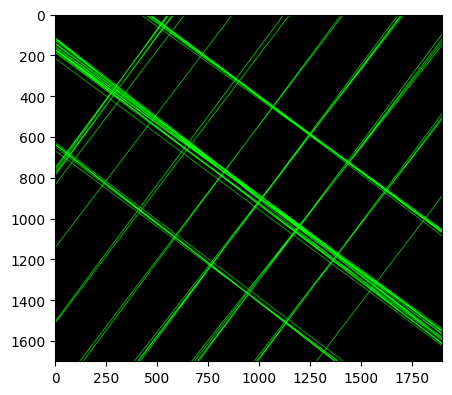

In [82]:
rho = 0.40
theta = 0.01
threshold = 80

black = np.zeros_like(pillbox)


lines = cv2.HoughLines(edges, rho=rho, theta=theta, threshold=threshold)

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = rhotheta2xy(line)
        cv2.line(black, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.subplots(1, 1, figsize=figsize)[1].imshow(black)

plt.show()

60591.5
58067.0
55727.5
65568.5
54459.0
64114.5
51496.5
63821.0
51555.0
63446.5
44191.5
57283.0
55058.0
47541.5


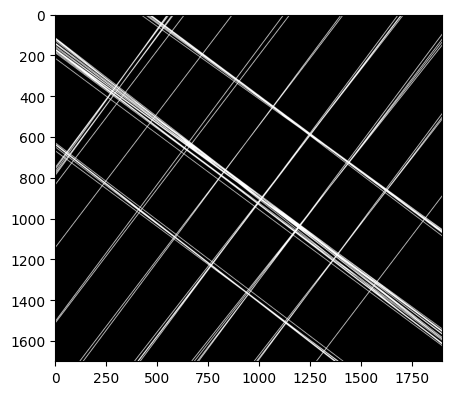

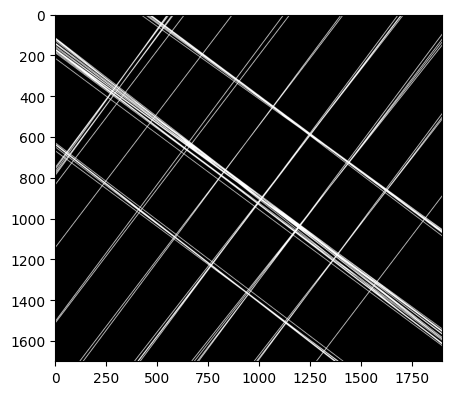

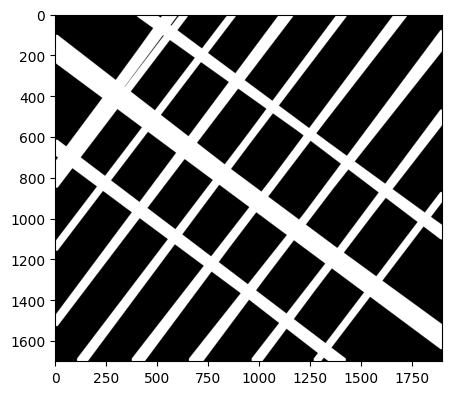

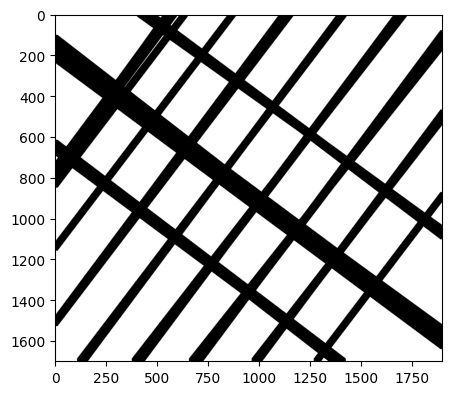

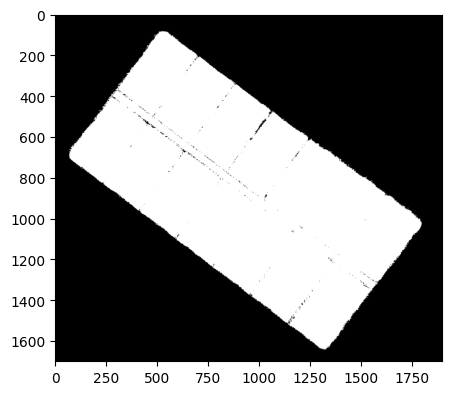

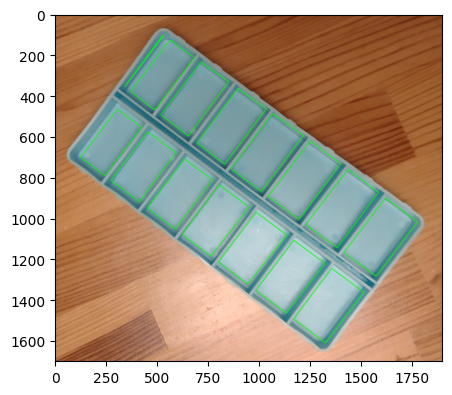

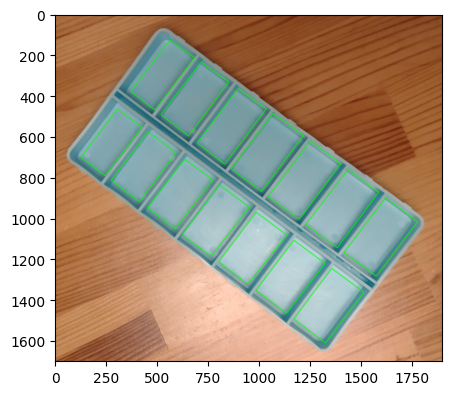

In [84]:
# Convert the lines image to grayscale
gray_lines = cv2.cvtColor(black, cv2.COLOR_BGR2GRAY)

plt.subplots(1, 1, figsize=figsize)[1].imshow(gray_lines, cmap="gray")
# Binarize the image
_, binary_lines = cv2.threshold(gray_lines, 1, 255, cv2.THRESH_BINARY)

plt.subplots(1, 1, figsize=figsize)[1].imshow(binary_lines, cmap="gray")

# Dilate the binary image
kernel = np.ones((9, 9), np.uint8)
dilated_lines = cv2.dilate(binary_lines, kernel, iterations=3)

plt.subplots(1, 1, figsize=figsize)[1].imshow(dilated_lines, cmap="gray")

dilated_lines = cv2.bitwise_not(dilated_lines)

plt.subplots(1, 1, figsize=figsize)[1].imshow(dilated_lines, cmap="gray")

hue_lower_band = 90
hue_upper_band = 110

# Convert the image to HSV
hsv = cv2.cvtColor(pillbox, cv2.COLOR_BGR2HSV)

pillbox_hue = hsv[..., 0]

# Create a mask for the hue values
mask = cv2.inRange(pillbox_hue, hue_lower_band, hue_upper_band)

plt.subplots(1, 1, figsize=figsize)[1].imshow(mask, cmap="gray")

dilated_lines = cv2.bitwise_and(dilated_lines, mask)

# Find contours
contours, _ = cv2.findContours(dilated_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw rectangles around detected contours
rectangles_image = pillbox.copy()
# Draw contours on the image
cv2.drawContours(rectangles_image, contours, -1, (0, 255, 0), 2)

# Display the result
plt.subplots(1, 1, figsize=figsize)[1].imshow(rectangles_image[..., ::-1])


# filter contours by area
# Print all areas
# for contour in contours:
#     print(cv2.contourArea(contour))

# Filter contours by area
filtered_contours = [c for c in contours if 40_000 < cv2.contourArea(c) < 66_000]

for contour in filtered_contours:
    print(cv2.contourArea(contour))

# Draw rectangles around detected contours
rectangles_image = pillbox.copy()
# Draw contours on the image
cv2.drawContours(rectangles_image, filtered_contours, -1, (0, 255, 0), 2)

# Display the result
plt.subplots(1, 1, figsize=figsize)[1].imshow(rectangles_image[..., ::-1])

[array([[[1355, 1247]],
 
        [[1353, 1249]],
 
        [[1353, 1250]],
 
        [[1350, 1253]],
 
        [[1350, 1254]],
 
        [[1347, 1257]],
 
        [[1347, 1258]],
 
        [[1344, 1261]],
 
        [[1344, 1262]],
 
        [[1341, 1265]],
 
        [[1341, 1266]],
 
        [[1337, 1270]],
 
        [[1337, 1271]],
 
        [[1334, 1274]],
 
        [[1334, 1275]],
 
        [[1331, 1278]],
 
        [[1331, 1279]],
 
        [[1328, 1282]],
 
        [[1328, 1283]],
 
        [[1325, 1286]],
 
        [[1325, 1287]],
 
        [[1322, 1290]],
 
        [[1322, 1291]],
 
        [[1318, 1295]],
 
        [[1318, 1296]],
 
        [[1315, 1299]],
 
        [[1315, 1300]],
 
        [[1312, 1303]],
 
        [[1312, 1304]],
 
        [[1309, 1307]],
 
        [[1309, 1308]],
 
        [[1306, 1311]],
 
        [[1306, 1312]],
 
        [[1303, 1315]],
 
        [[1303, 1316]],
 
        [[1299, 1320]],
 
        [[1299, 1321]],
 
        [[1296, 1324]],
 
        [[12